In [1]:
%load_ext autoreload
%autoreload 2

# 1. Create dataset
Use Sam to extract proposals from input images (100 images) then for proposals with same regions as the ground truth masks, they are considered as positive sameple to the templates ( use the BlenderProc 42 templates), negative otherwise

Run through 100 images - then return positive proposals and negative proposals

Use IoU >0.5 to get the postive proposals

## 1.1 Extract positive proposals, negative proposals, anchors

In [2]:
# # this is the one we use
# from src.model.constrastive_learning import extract_dataset_train_pbr_icbin_obj2

# dataset = "icbin"
# data_type = "train_pbr"
# scene_id = 0
# target_object_id = 2
# pos_proposals, neg_proposals, best_mask_indices = extract_dataset_train_pbr_icbin_obj2(dataset, data_type, scene_id, target_object_id) # Take 2.21 minutes

In [3]:
# all_pos_proposals = [item for sublist in pos_proposals for item in sublist if item["rgb"] is not None]
# all_neg_proposals = [item for sublist in neg_proposals for item in sublist]
# print("len(all_pos_proposals), len(all_neg_proposals)", len(all_pos_proposals), len(all_neg_proposals))

In [4]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(200, 500, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(all_pos_proposals):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(all_pos_proposals[image_index]["rgb"]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [5]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(0, 500, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(all_neg_proposals):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(all_neg_proposals[image_index]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [6]:
# # Filtering out all wrong image in the neg (it should be ignored)
# # Indices to remove
# indices_to_remove = [
#     16, 48, 49, 67, 82, 100, 171, 180, 201,
#     222, 223, 240, 241, 279, 280, 283, 320,
#     334, 344, 349, 387, 388, 400, 403, 407,
#     408, 411, 412, 417, 419, 421, 442, 458,
#     460, 461, 472, 474, 485
# ]

# # Create a new list excluding the specified indices
# filtered_all_neg_proposals = [item for index, item in enumerate(all_neg_proposals) if index not in indices_to_remove]


In [7]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(0, 500, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(filtered_all_neg_proposals):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(filtered_all_neg_proposals[image_index]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [8]:
# import pickle
# # train_pbr_pos_proposals_obj_2_filtered means dataset with neg only from background not from object 1 
# # train_pbr_pos_proposals_obj_2_filtered_self_rendered is like train_pbr_pos_proposals_obj_2_filtered but the dataset now is render from prbr selbts not from given dataset
# # train_pbr_pos_proposals_obj_2_filtered_self_rendered_ver1 is just that all the neg are now really correct 
# with open('contrastive_learning/outputs/train_pbr_pos_proposals_obj_2_filtered_self_rendered_ver1.pkl', 'wb') as file:
#     pickle.dump(all_pos_proposals, file)

# with open('contrastive_learning/outputs/train_pbr_neg_proposals_obj_2_filtered_self_rendered_ver1.pkl', 'wb') as file:
#     pickle.dump(filtered_all_neg_proposals, file)

# Start from here

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

# train_pbr_neg_proposals_sam_inside_100_pre_filter is the best one to choose

with open('contrastive_learning/outputs/train_pbr_pos_proposals_sam_inside_100_pre_filter.pkl', 'rb') as file:
    pos = pickle.load(file)

with open('contrastive_learning/outputs/train_pbr_neg_proposals_sam_inside_100_pre_filter.pkl', 'rb') as file:
    neg = pickle.load(file)

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(0, 500, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(neg):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(pos[image_index]["rgb"]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display at a time
# images_per_page = 25

# # Define the number of rows and columns for the grid
# rows = 5
# cols = 5

# # Iterate over the images in steps of images_per_page
# for i in range(150, 250, images_per_page):
#     # Create a new figure for each set of 25 images
#     plt.figure(figsize=(15, 15))

#     for j in range(images_per_page):
#         # Calculate the current image index
#         image_index = i + j

#         # Check if the image_index is within the bounds of the list
#         if image_index >= len(neg):
#             break

#         # Add a subplot for the current image
#         plt.subplot(rows, cols, j + 1)
#         plt.imshow(np.array(pos_obj_1_without_pose[image_index]))
#         plt.title(f"Image {image_index}")
#         plt.axis('off')

#     # Display the figure containing 25 images
#     plt.show()


In [3]:
len(pos)

4288

## 1.2 Create positive and negative pairs
Positive pairs (positive proposal and template with most similar pose)

In [3]:
import torch

from src.model.constrastive_learning import ContrastiveLearningModel


# template_paths = "datasets/bop23_challenge/datasets/templates_pyrender/icbin/obj_000001/*.png"
# template_poses_path = "datasets/bop23_challenge/datasets/templates_pyrender/icbin/template_poses.npy"
template_paths = "foundpose_analysis/icbin/templates/train_pbr/obj_000001_original/*.png"
template_poses_path = "foundpose_analysis/icbin/templates/train_pbr/obj_000001_original/poses.pkl"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ContrastiveLearningModel(device)
# model.load_state_dict(torch.load("contrastive_learning/saved_checkpoints/best_model_checkpoint.pth"))

Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
/home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
[2024-10-15 15:44:30,739] [INFO] dinov2: using MLP layer as FFN
[2024-10-15 15:44:42,280] [INFO] src.model.constrastive_learning: model used is dinov2_vitl14_reg with more aumneation method


In [4]:
from src.model.contrastivelearning_info_nce import prepare_dataset
train_dataset, val_dataset, test_dataset, val_set = prepare_dataset(
    template_paths, template_poses_path, pos[:100], neg[:] # build only 1000 postive images
    )

 60%|██████    | 60/100 [00:16<00:10,  3.92it/s][2024-10-15 15:44:59,798] [INFO] src.model.constrastive_learning_utils: Size of pos proposal: (3, 49, 39)
[2024-10-15 15:44:59,886] [INFO] src.model.constrastive_learning_utils: Size of pos proposal: (3, 80, 54)
100%|██████████| 100/100 [00:26<00:00,  3.72it/s]


In [6]:
from torch.utils.data import DataLoader, Dataset


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=1)

[2024-10-15 15:46:06,710] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.9951198257080607].
[2024-10-15 15:46:06,738] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4831372549019606].
[2024-10-15 15:46:06,761] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.9951198257080607].
[2024-10-15 15:46:06,796] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4831372549019606].
[2024-10-15 15:46:06,821] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

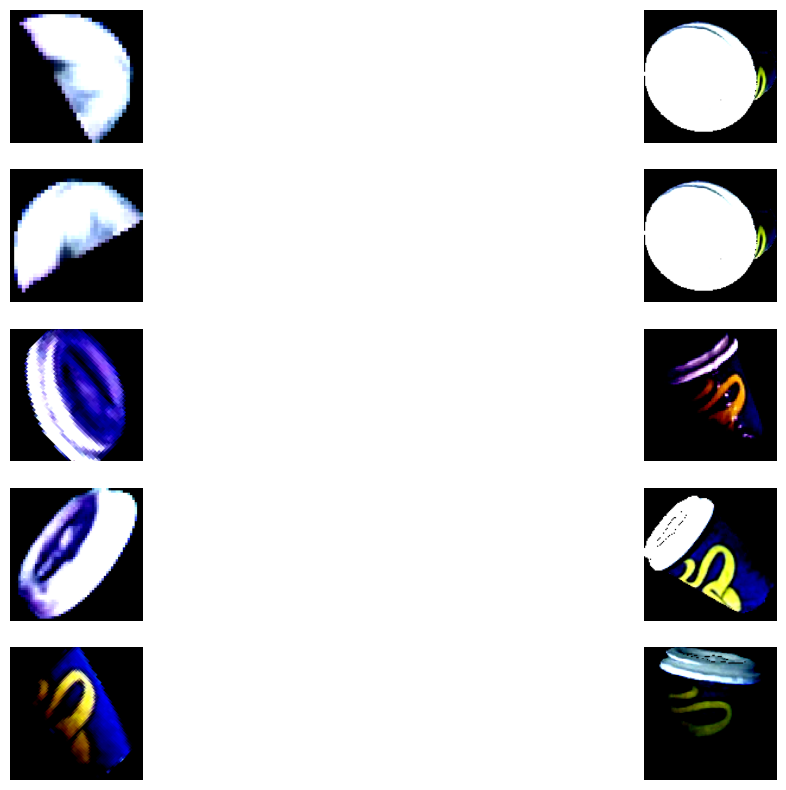

[2024-10-15 15:46:07,218] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.0539433551198258].
[2024-10-15 15:46:07,243] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2391285403050105].
[2024-10-15 15:46:07,256] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3088453159041396].
[2024-10-15 15:46:07,262] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-15 15:46:07,300] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

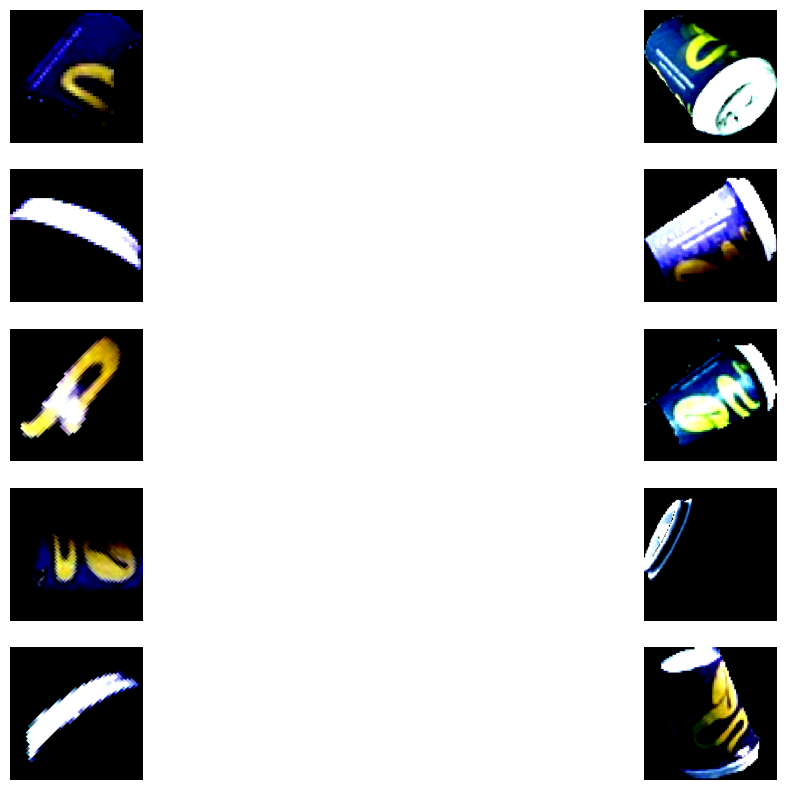

[2024-10-15 15:46:07,600] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.9988012672317836].
[2024-10-15 15:46:07,612] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.0822657952069714].
[2024-10-15 15:46:07,643] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.8556862745098035].
[2024-10-15 15:46:07,653] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3437037037037034].
[2024-10-15 15:46:07,685] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

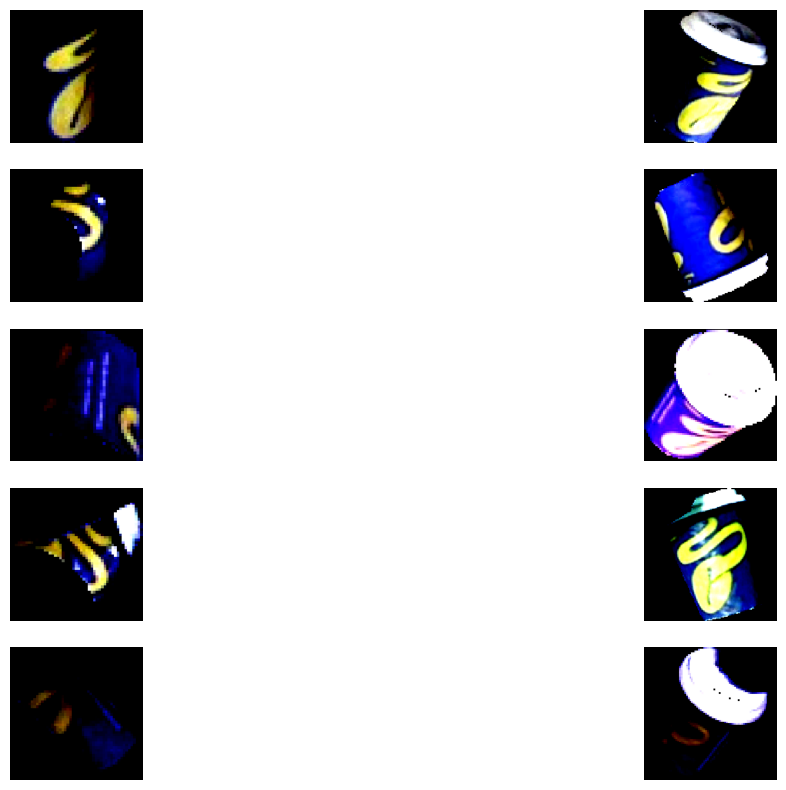

[2024-10-15 15:46:08,073] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.1519825708061].
[2024-10-15 15:46:08,110] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-15 15:46:08,123] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.245664488017429].
[2024-10-15 15:46:08,141] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-15 15:46:08,163] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats

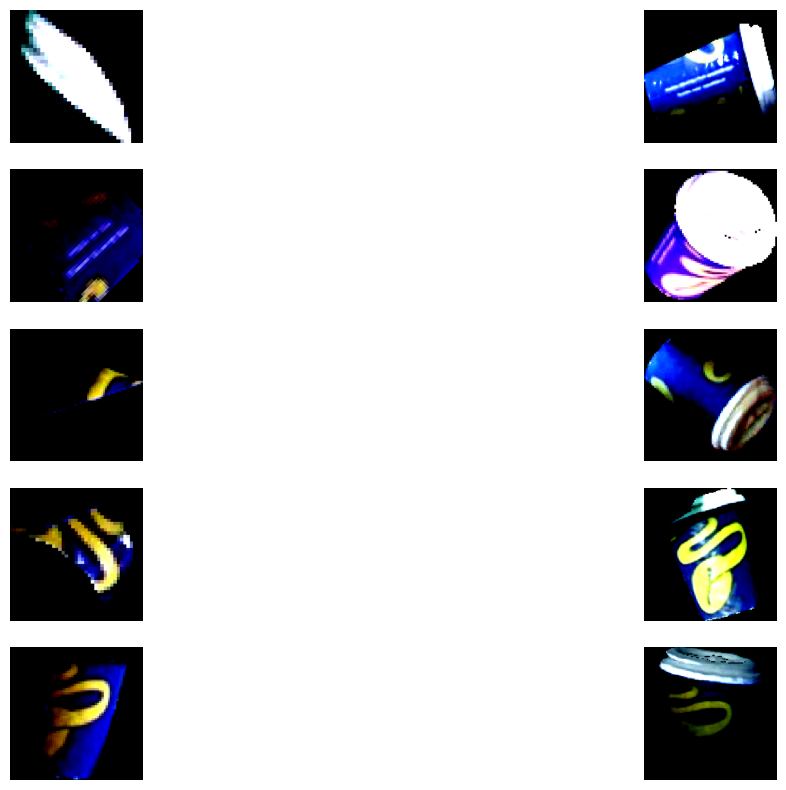

In [5]:
import matplotlib.pyplot as plt

# Define the number of pairs to show at a time
pairs_per_page = 5

# Iterate over the specified range of pairs, in steps of `pairs_per_page`
for i in range(20, 40, pairs_per_page):
    # Create a new figure for each set of 5 pairs
    plt.figure(figsize=(15, 10))  # Adjusted the figsize for multiple pairs

    for j in range(pairs_per_page):
        # Calculate the current pair index
        pair_index = i + j

        # Check if the pair_index is within the bounds of the list
        if pair_index >= len(val_set):
            break

        pair = val_set[pair_index]

        # First image in the pair (img2)
        plt.subplot(pairs_per_page, 2, 2*j + 1)
        plt.imshow(pair["pos"].permute(1, 2, 0))
        plt.axis('off')

        # Second image in the pair (img1)
        plt.subplot(pairs_per_page, 2, 2*j + 2)
        plt.imshow(pair["anchor"].permute(1, 2, 0))
        plt.axis('off')

    # Display the figure containing 5 pairs
    plt.show()


[2024-10-15 15:11:58,057] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6225708061002178].
[2024-10-15 15:11:58,066] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.099694989106754].
[2024-10-15 15:11:58,076] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.256557734204793].
[2024-10-15 15:11:58,085] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.570283224400871].
[2024-10-15 15:11:58,095] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for float

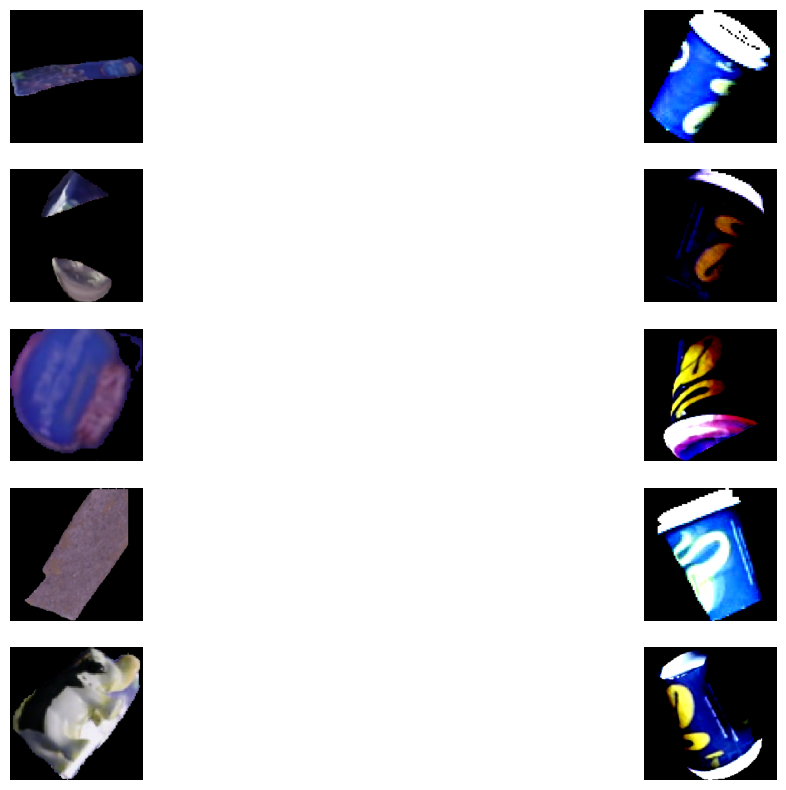

[2024-10-15 15:11:58,162] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3611328976034858].
[2024-10-15 15:11:58,173] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3785620915032677].
[2024-10-15 15:11:58,183] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4482788671023967].
[2024-10-15 15:11:58,194] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.552854030501089].
[2024-10-15 15:11:58,204] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for flo

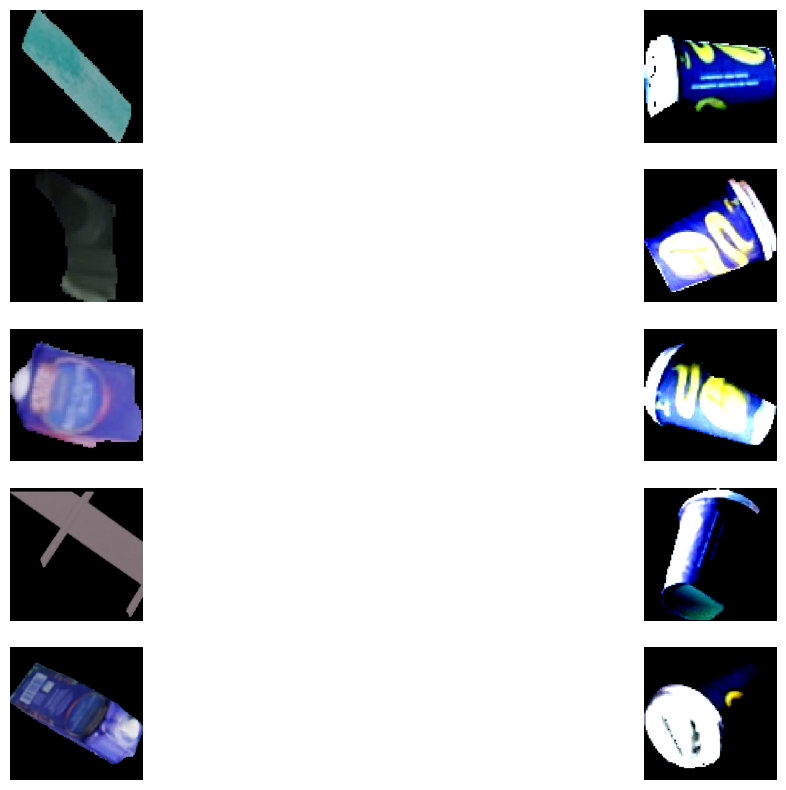

[2024-10-15 15:11:58,269] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.413420479302832].
[2024-10-15 15:11:58,278] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.570283224400871].
[2024-10-15 15:11:58,287] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2914161220043567].
[2024-10-15 15:11:58,298] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].
[2024-10-15 15:11:58,307] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

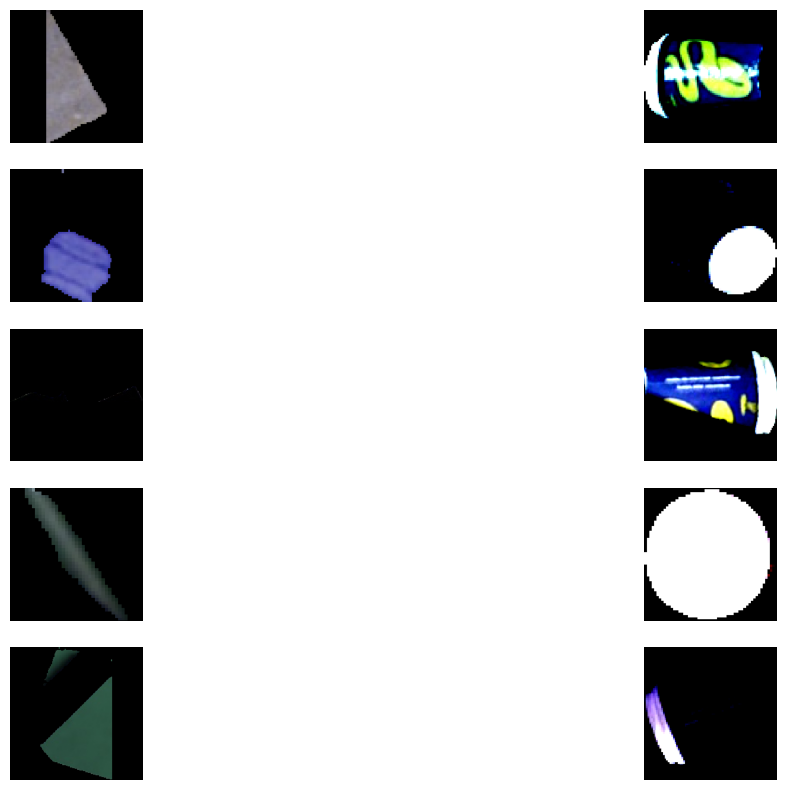

[2024-10-15 15:11:58,365] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2914161220043567].
[2024-10-15 15:11:58,375] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3437037037037034].
[2024-10-15 15:11:58,384] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.012549019607843].
[2024-10-15 15:11:58,394] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.273986928104575].
[2024-10-15 15:11:58,581] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

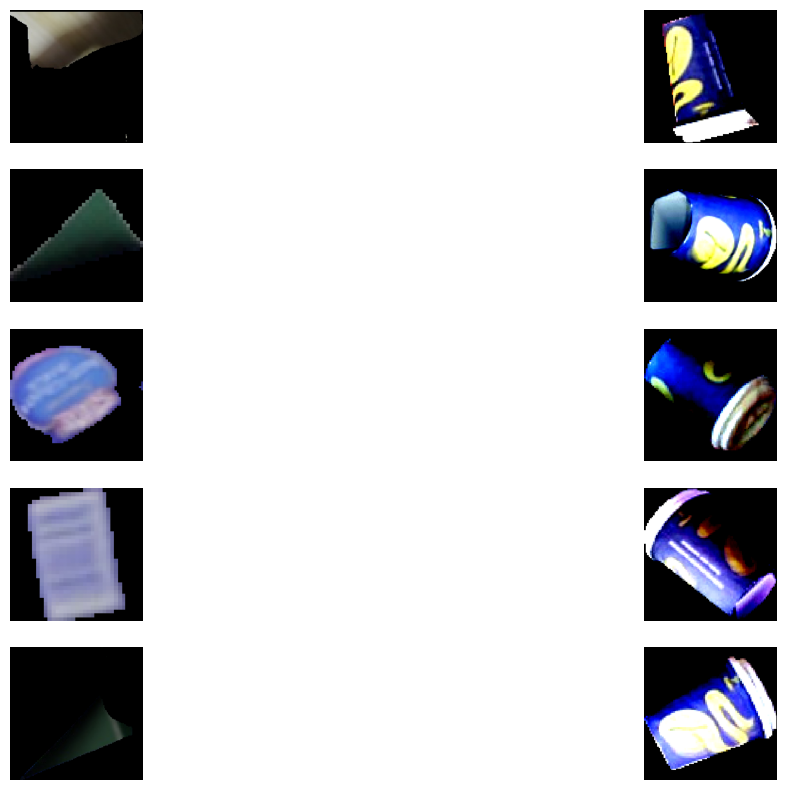

In [14]:
import matplotlib.pyplot as plt

# Define the number of pairs to show at a time
pairs_per_page = 5

# Iterate over the specified range of pairs, in steps of `pairs_per_page`
for i in range(20, 40, pairs_per_page):
    # Create a new figure for each set of 5 pairs
    plt.figure(figsize=(15, 10))  # Adjusted the figsize for multiple pairs

    for j in range(pairs_per_page):
        # Calculate the current pair index
        pair_index = i + j

        # Check if the pair_index is within the bounds of the list
        if pair_index >= len(val_set):
            break

        pair = val_set[pair_index]

        # First image in the pair (img2)
        plt.subplot(pairs_per_page, 2, 2*j + 1)
        plt.imshow(pair["neg"].permute(1, 2, 0))
        plt.axis('off')

        # Second image in the pair (img1)
        plt.subplot(pairs_per_page, 2, 2*j + 2)
        plt.imshow(pair["anchor"].permute(1, 2, 0))
        plt.axis('off')

    # Display the figure containing 5 pairs
    plt.show()


[2024-10-08 21:30:31,482] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.787767098124653].
[2024-10-08 21:30:31,488] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.552854030501089].


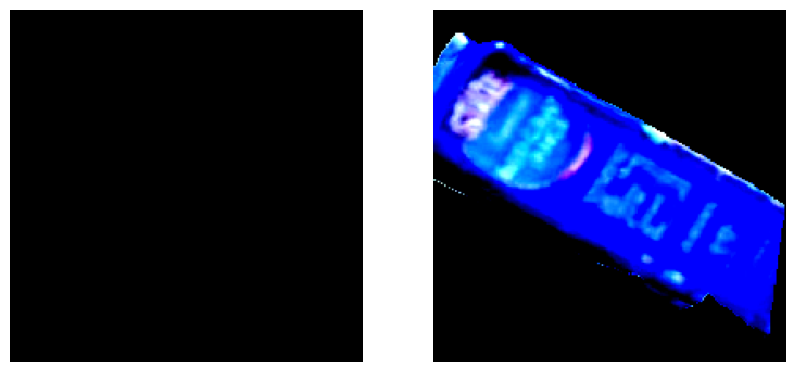

[2024-10-08 21:30:31,523] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7870836003246615].
[2024-10-08 21:30:31,528] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.8905446623093682].


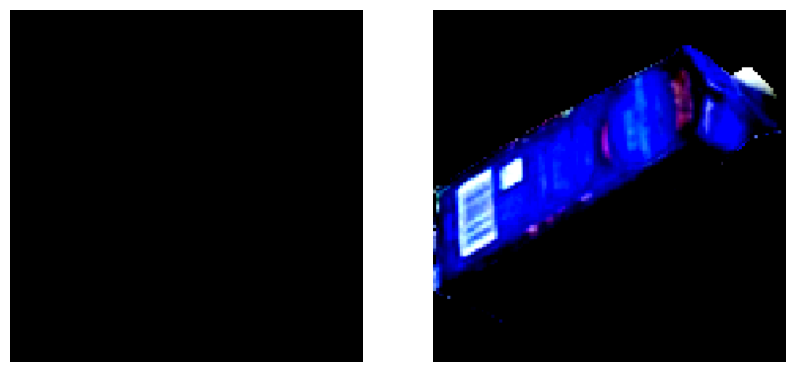

[2024-10-08 21:30:31,562] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7916630355846042].
[2024-10-08 21:30:31,568] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4831372549019606].


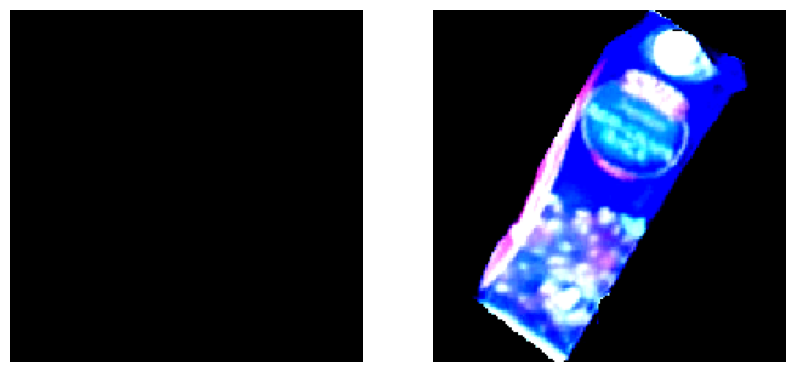

[2024-10-08 21:30:31,605] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.788245546584647].
[2024-10-08 21:30:31,610] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


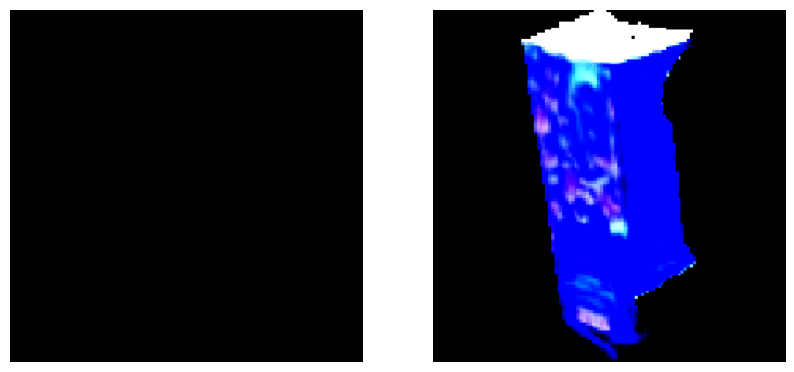

[2024-10-08 21:30:31,639] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.787835447904652].
[2024-10-08 21:30:31,645] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


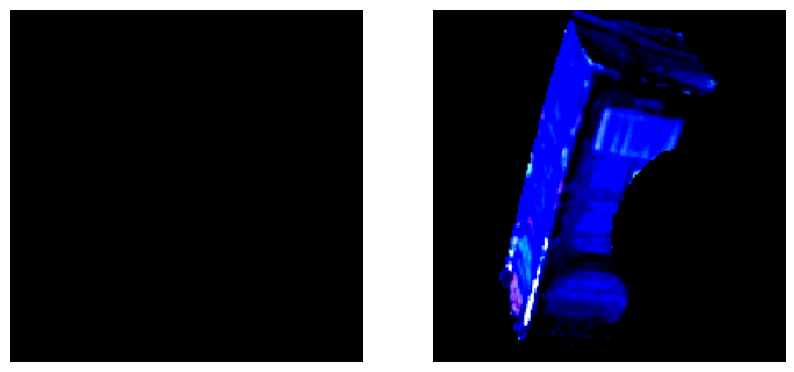

[2024-10-08 21:30:31,680] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.791457986244607].
[2024-10-08 21:30:31,685] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2914161220043567].


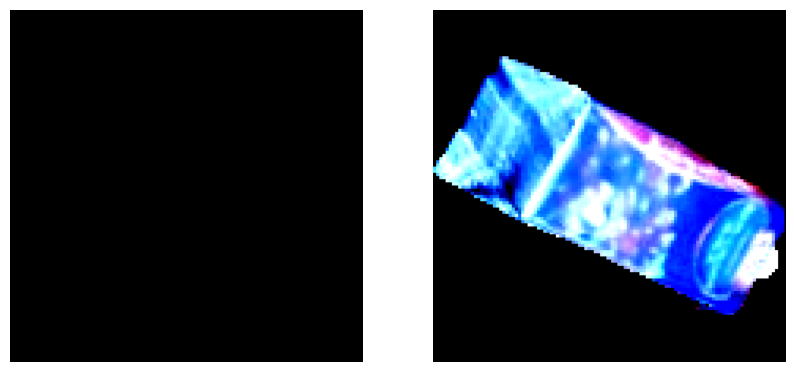

[2024-10-08 21:30:31,722] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7893391430646333].
[2024-10-08 21:30:31,730] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.256557734204793].


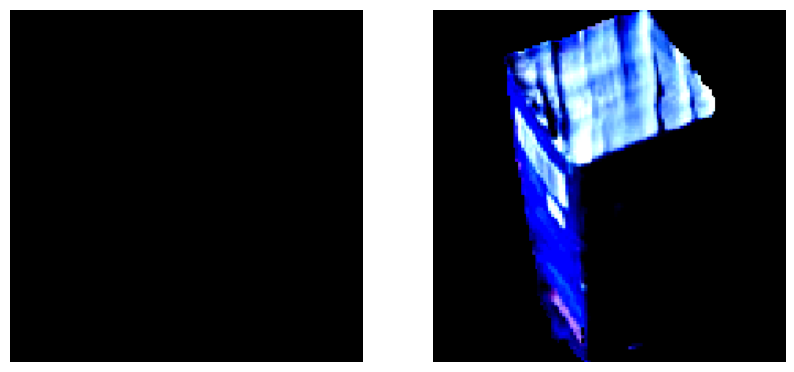

[2024-10-08 21:30:31,764] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7879037976846512].
[2024-10-08 21:30:31,770] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.517995642701525].


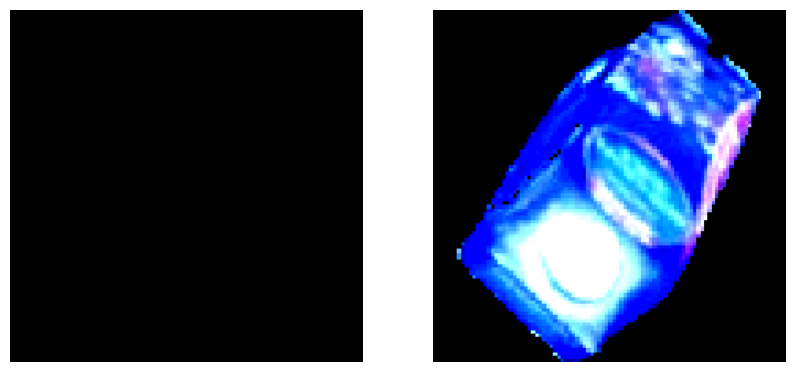

[2024-10-08 21:30:31,806] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.7750762527233116].
[2024-10-08 21:30:31,811] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.1345533769063176].


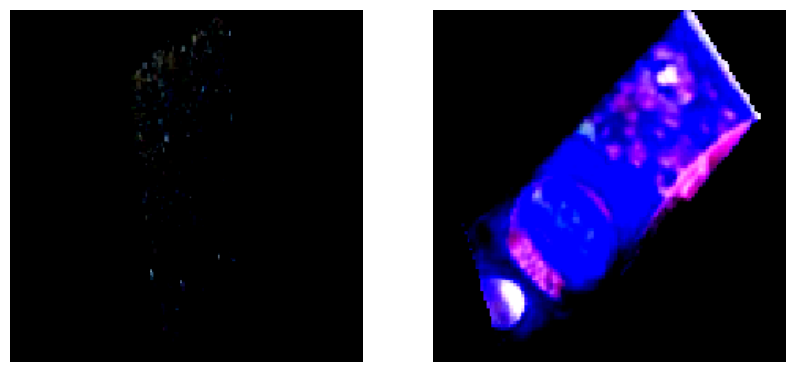

[2024-10-08 21:30:31,842] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.788313896364646].
[2024-10-08 21:30:31,851] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


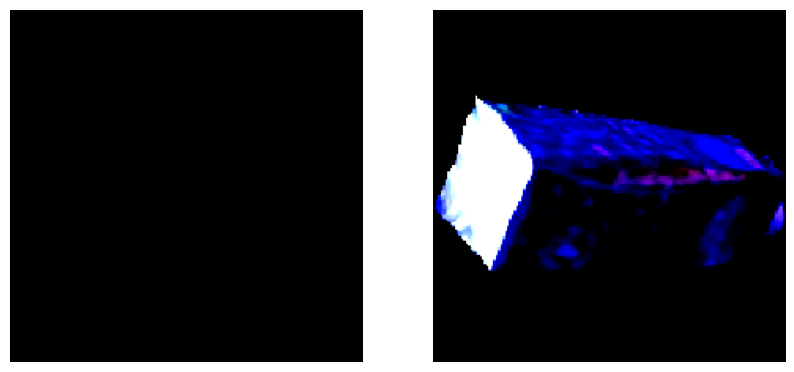

[2024-10-08 21:30:31,881] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7958323721645522].
[2024-10-08 21:30:31,886] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


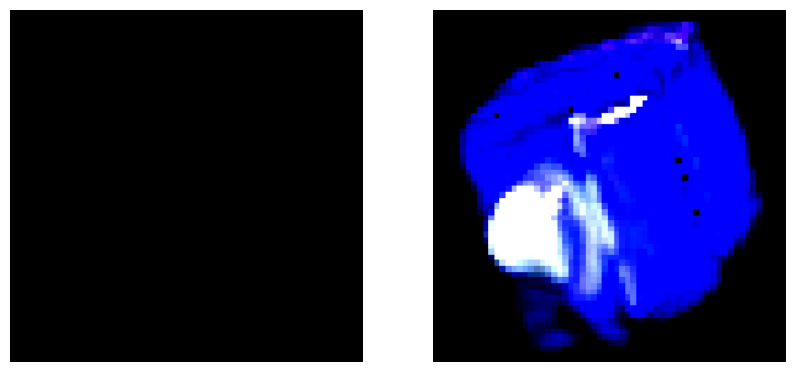

[2024-10-08 21:30:31,911] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7900226408646247].
[2024-10-08 21:30:31,916] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.517995642701525].


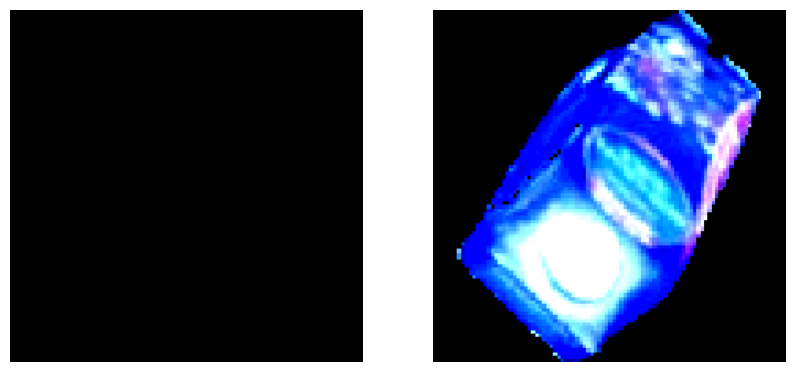

[2024-10-08 21:30:31,947] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7886556452646418].
[2024-10-08 21:30:31,952] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.4482788671023967].


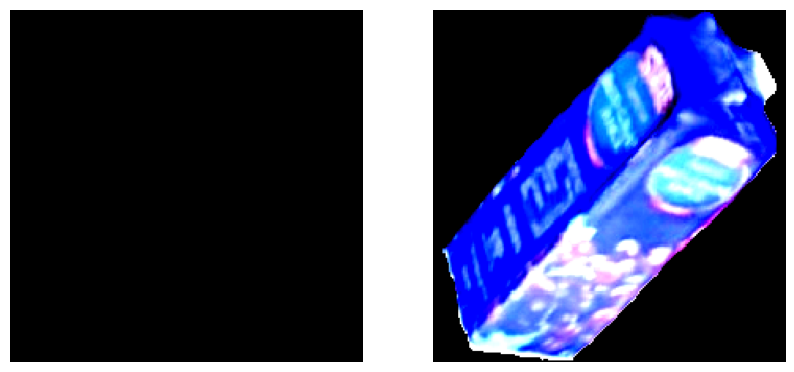

[2024-10-08 21:30:31,990] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7955589730445556].
[2024-10-08 21:30:31,995] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3088453159041396].


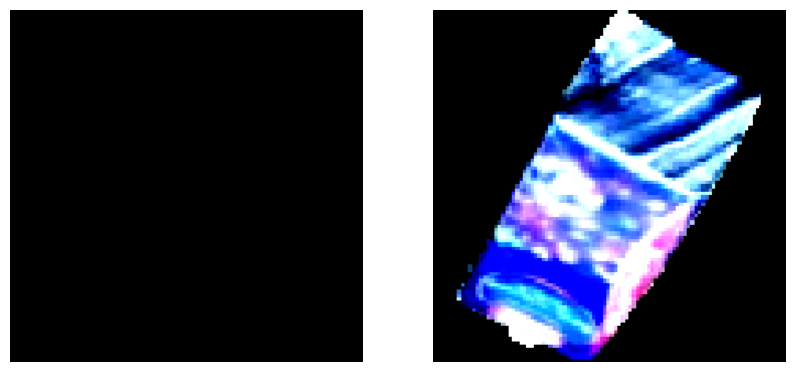

[2024-10-08 21:30:32,031] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7880404972446495].
[2024-10-08 21:30:32,036] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


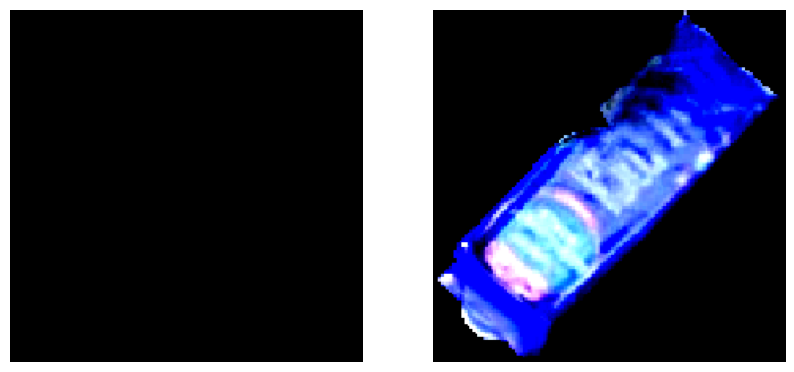

[2024-10-08 21:30:32,073] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.788723995044641].
[2024-10-08 21:30:32,079] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


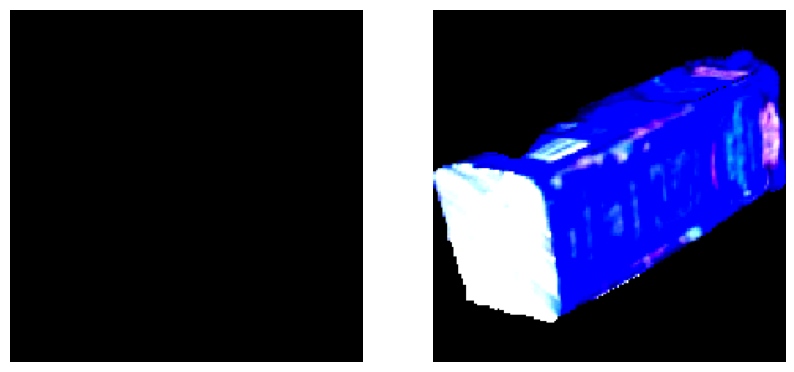

[2024-10-08 21:30:32,271] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7884505959246444].
[2024-10-08 21:30:32,276] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3785620915032677].


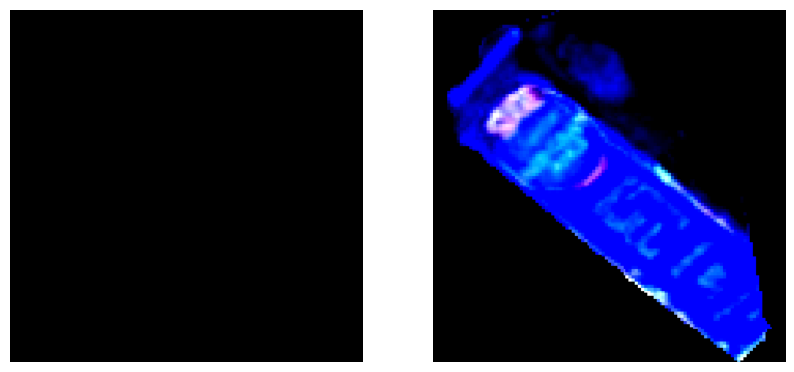

[2024-10-08 21:30:32,305] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7879037976846512].
[2024-10-08 21:30:32,310] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.552854030501089].


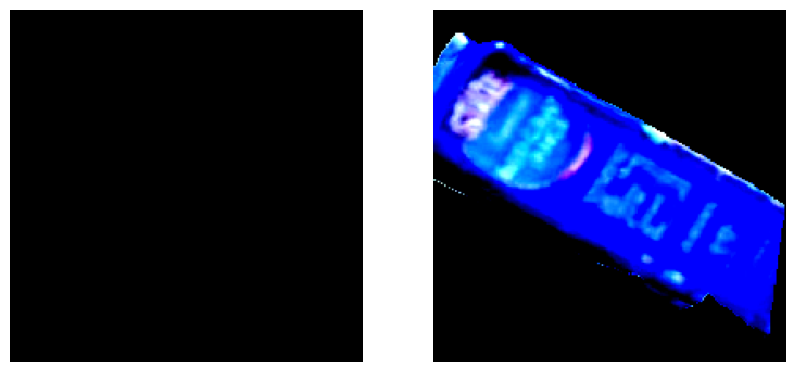

[2024-10-08 21:30:32,346] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7888606946046393].
[2024-10-08 21:30:32,351] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


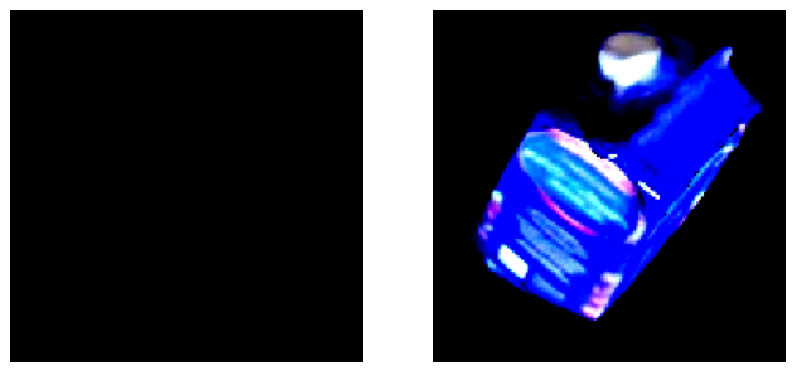

[2024-10-08 21:30:32,384] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.788723995044641].
[2024-10-08 21:30:32,390] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.413420479302832].


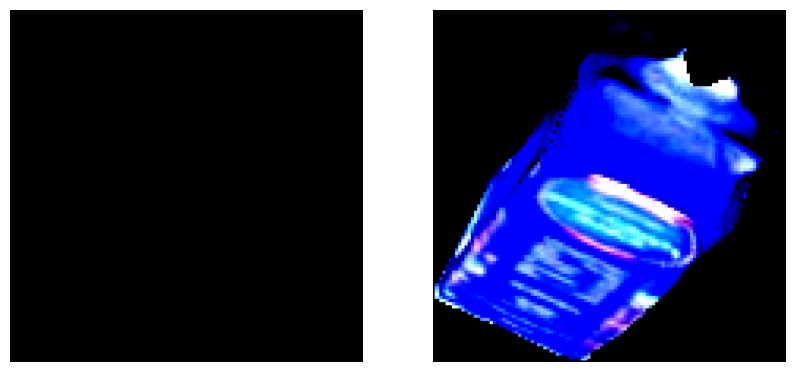

[2024-10-08 21:30:32,422] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7883822461446452].
[2024-10-08 21:30:32,427] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2216993464052286].


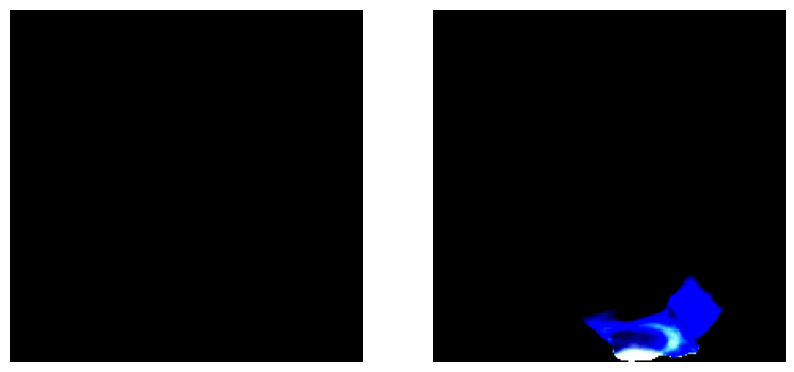

[2024-10-08 21:30:32,454] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.792073134264599].
[2024-10-08 21:30:32,460] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


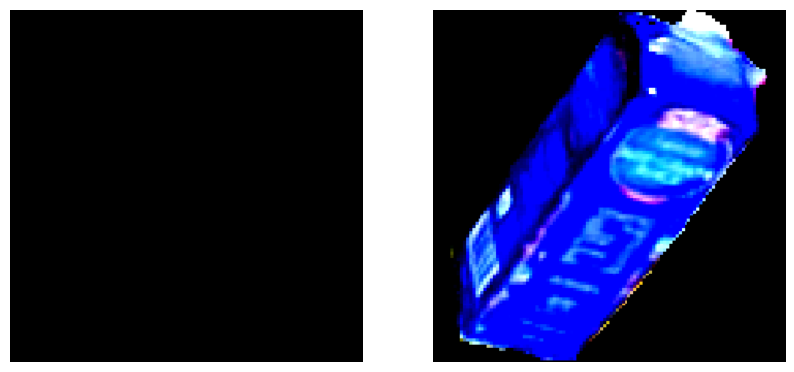

[2024-10-08 21:30:32,496] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7961057712845487].
[2024-10-08 21:30:32,501] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.605141612200436].


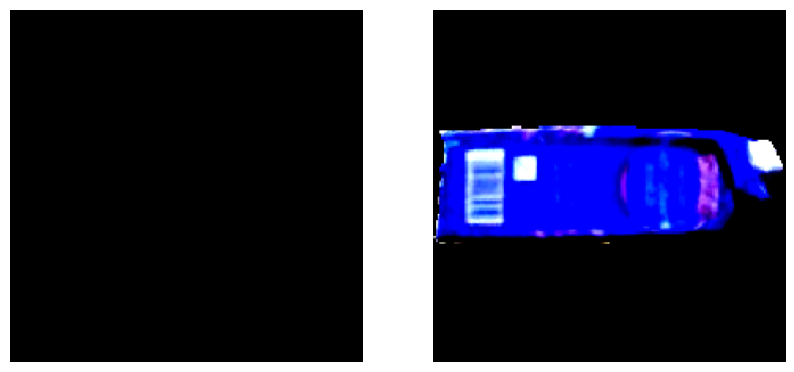

[2024-10-08 21:30:32,531] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.629106753812636].
[2024-10-08 21:30:32,536] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.012549019607843].


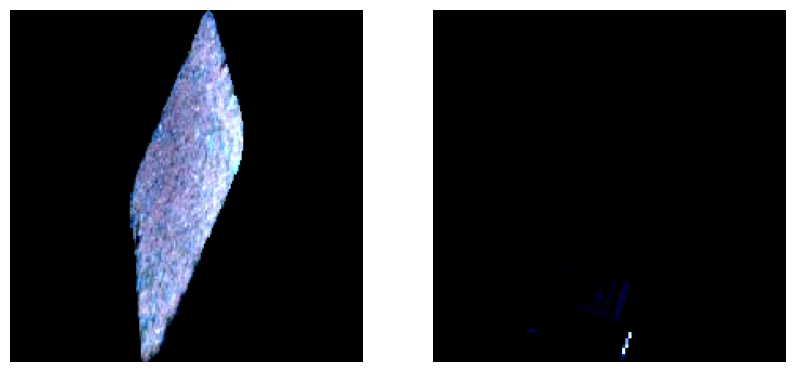

[2024-10-08 21:30:32,565] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7922781836045967].
[2024-10-08 21:30:32,571] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2216993464052286].


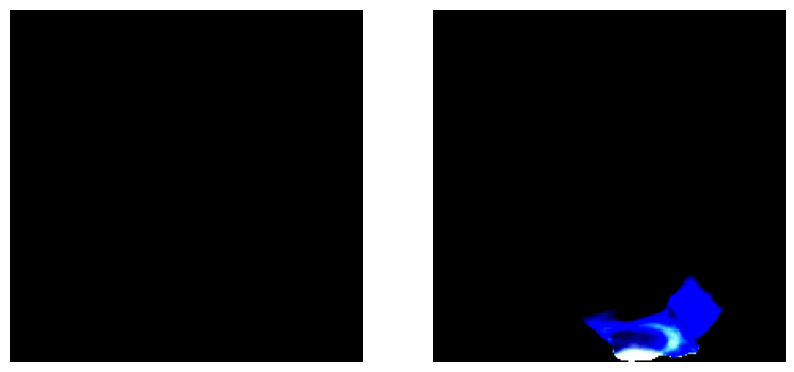

[2024-10-08 21:30:32,597] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7887923448246401].
[2024-10-08 21:30:32,601] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


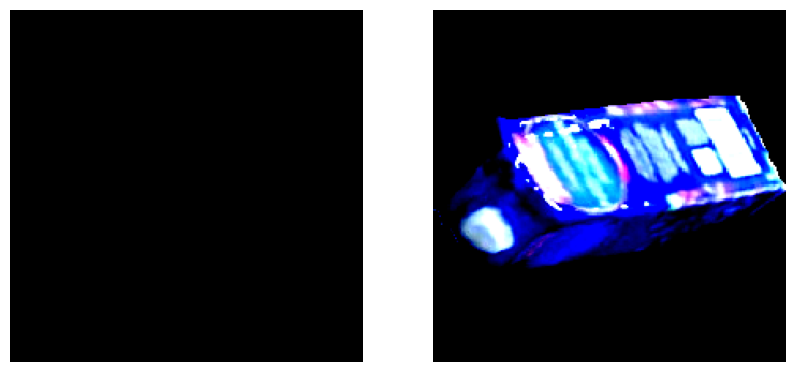

[2024-10-08 21:30:32,635] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7889290443846384].
[2024-10-08 21:30:32,639] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3262745098039215].


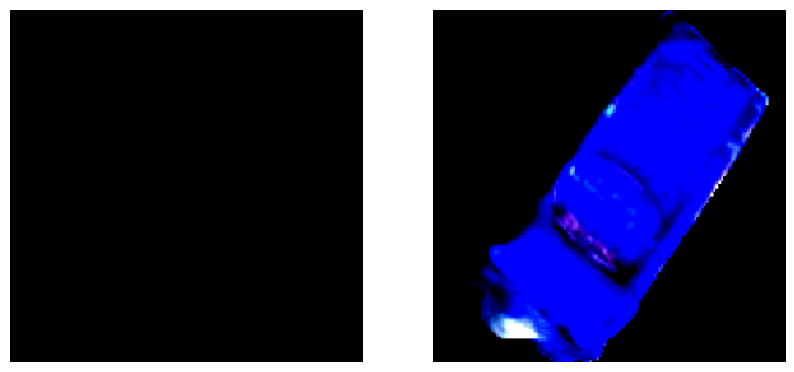

[2024-10-08 21:30:32,669] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7894074928446324].
[2024-10-08 21:30:32,674] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..1.8556862745098035].


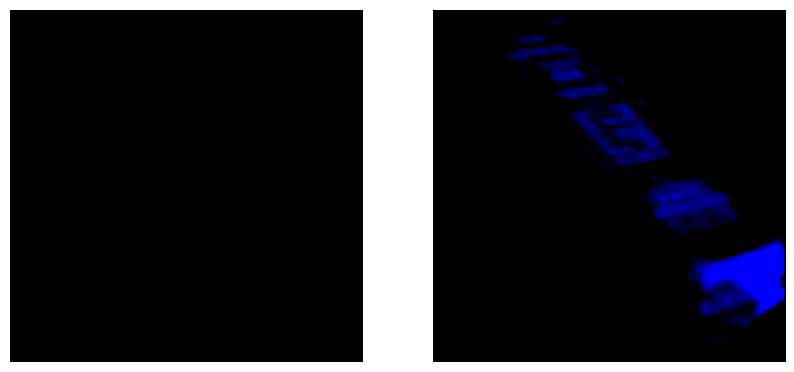

[2024-10-08 21:30:32,701] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.6301525054466233].
[2024-10-08 21:30:32,707] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


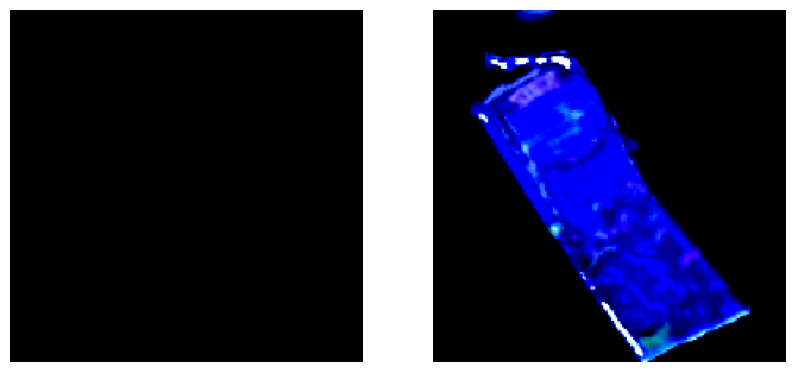

[2024-10-08 21:30:32,740] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.5136383442265795].
[2024-10-08 21:30:32,745] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


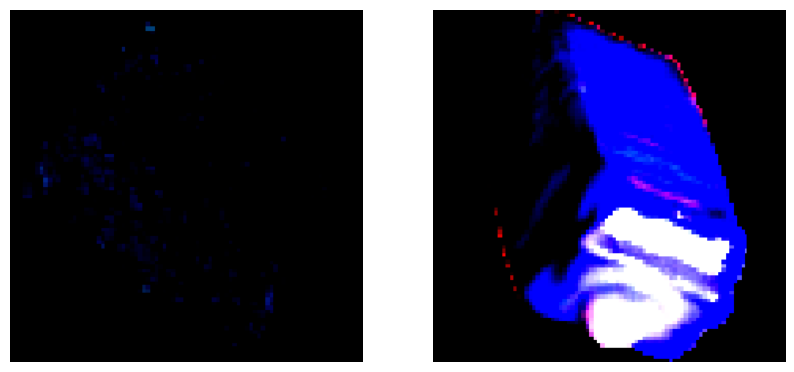

[2024-10-08 21:30:32,775] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7945337263445684].
[2024-10-08 21:30:32,780] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.273986928104575].


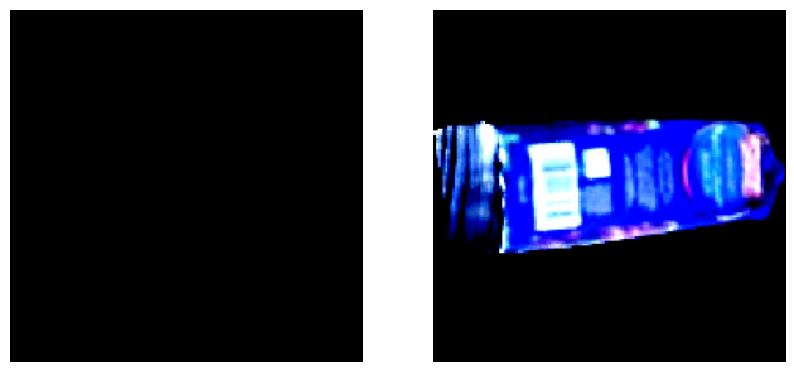

[2024-10-08 21:30:32,812] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7917313853646035].
[2024-10-08 21:30:32,818] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.2914161220043567].


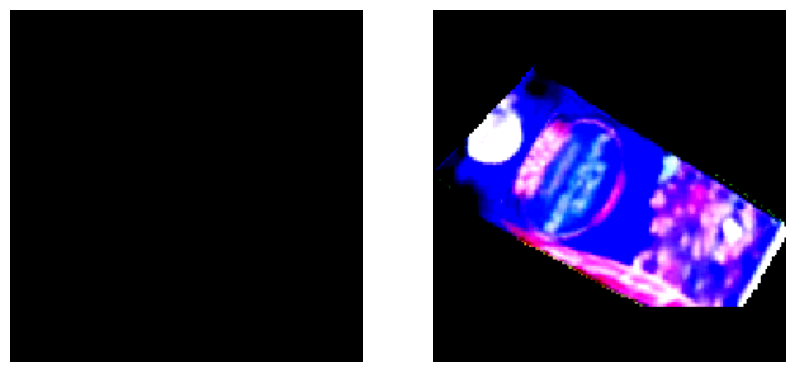

[2024-10-08 21:30:32,853] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7896125421846298].
[2024-10-08 21:30:32,860] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


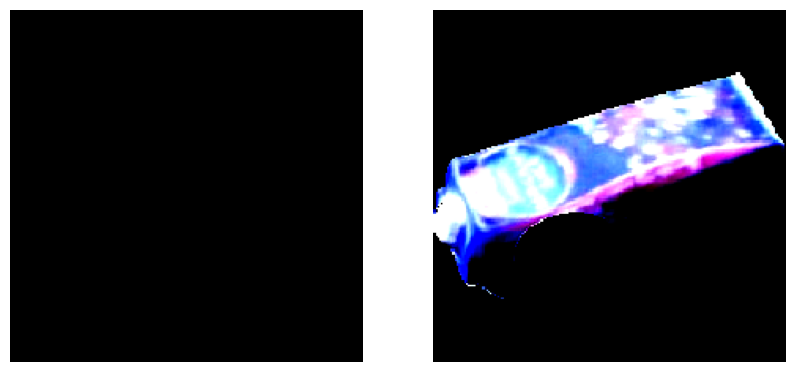

[2024-10-08 21:30:32,895] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7960374215045496].
[2024-10-08 21:30:32,899] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


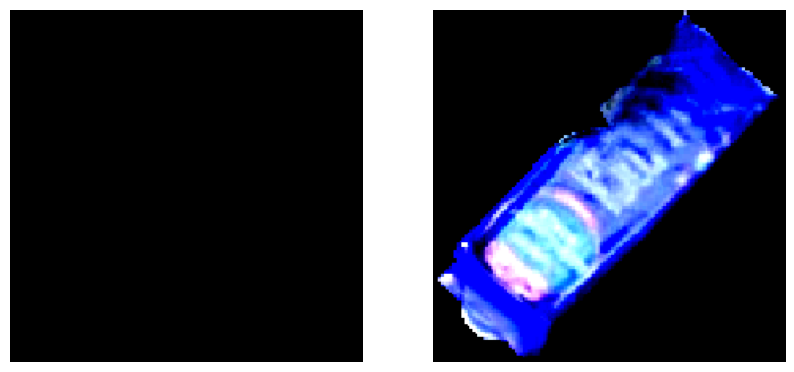

[2024-10-08 21:30:32,932] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7939185783245761].
[2024-10-08 21:30:32,937] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.3959912854030496].


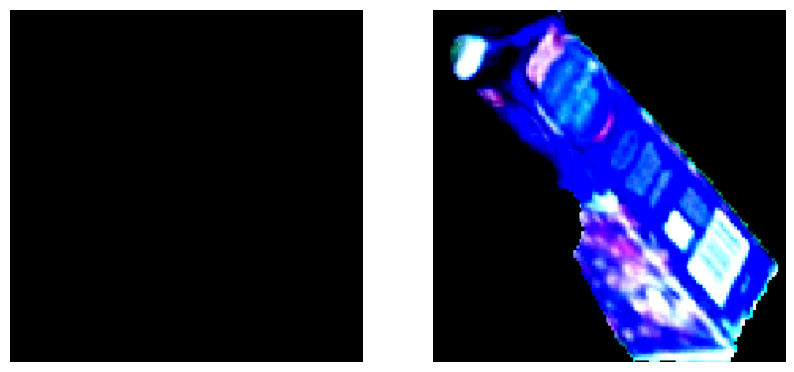

[2024-10-08 21:30:32,969] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7947387756845659].
[2024-10-08 21:30:32,974] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.1868409586056643].


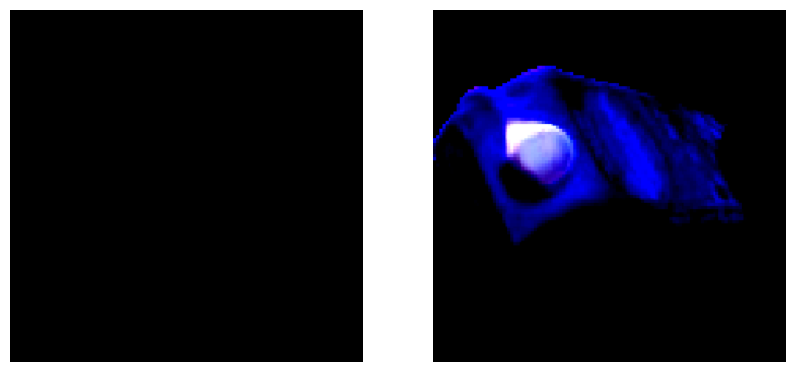

[2024-10-08 21:30:33,004] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.79760946644453].
[2024-10-08 21:30:33,009] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


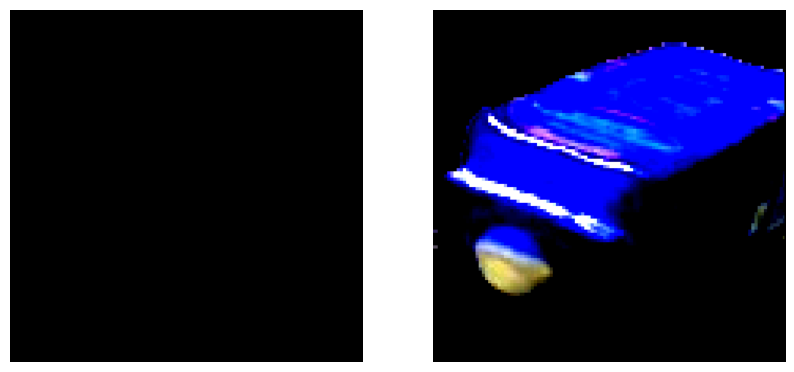

[2024-10-08 21:30:33,039] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.7924832329445939].
[2024-10-08 21:30:33,043] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..0.6705010893246187].


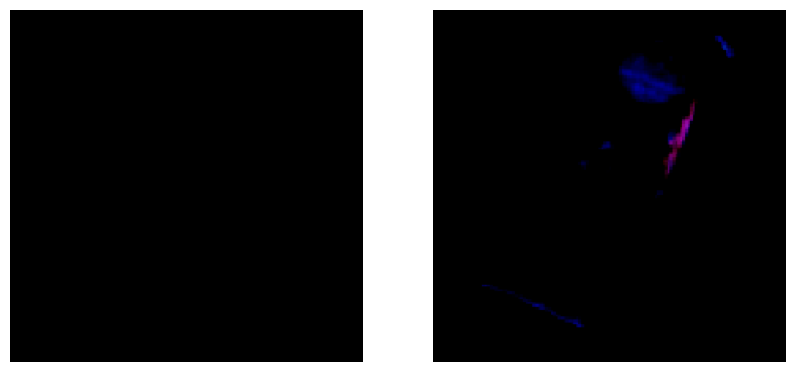

[2024-10-08 21:30:33,077] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.788245546584647].
[2024-10-08 21:30:33,082] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


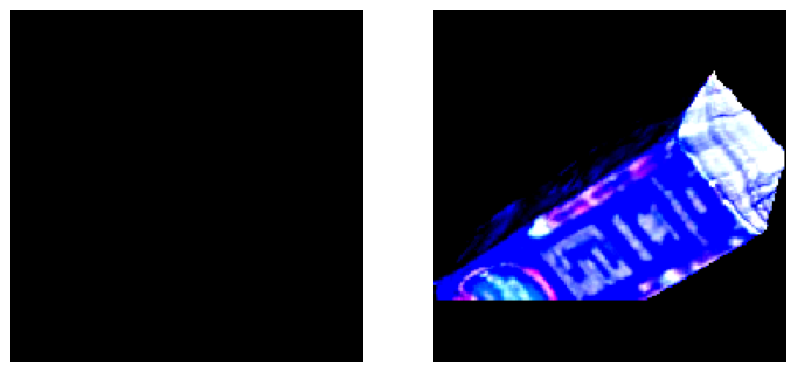

[2024-10-08 21:30:33,118] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..-1.788245546584647].
[2024-10-08 21:30:33,123] [WARNING] matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039301310043..2.6399999999999997].


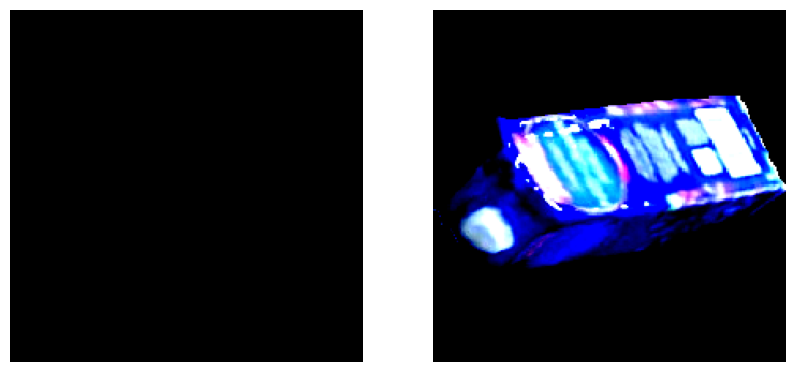

In [24]:
import matplotlib.pyplot as plt
for pair in train_negative_pairs[:40]:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(pair["img1"].permute(1,2,0))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(pair["img2"].permute(1,2,0))
    plt.axis('off')

    plt.show()

In [25]:
from src.model.constrastive_learning import train_contrastive_loss, train_contrastive_loss_hard_case_mining
dataset = "icbin"
train_contrastive_loss(device, model, train_loader, val_loader, num_epochs=15, dataset=dataset)
# train_contrastive_loss(device, model, train_dataset, val_dataset, test_dataset, num_epochs=25) # this time train_pbr

[2024-10-08 21:30:33,196] [ERROR] wandb.jupyter: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: damvancuong510. Use `wandb login --relogin` to force relogin


Training:   0%|          | 0/15 [00:00<?, ?it/s]/home/cuong.van-dam/miniconda3/envs/cnos/lib/python3.9/site-packages/xformers/ops/unbind.py:46: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage_data_ptr = tensors[0].storage().data_ptr()
/home/cuong.van-dam/miniconda3/envs/cnos/lib/python3.9/site-packages/xformers/ops/unbind.py:48: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if x.storage().data_ptr() != storage_data_ptr:
[2024-10-08 21:41:47,082] [INFO] src.model.constrastive_learning: Epoch 1/15 loss: 0.977

best_val_loss:  0.06972222173880749
saving best model at epoch:  0


Training:  20%|██        | 3/15 [34:13<2:16:01, 680.10s/it][2024-10-08 22:16:52,935] [INFO] src.model.constrastive_learning: Epoch 4/15 loss: 0.14414
[2024-10-08 22:17:28,186] [INFO] src.model.constrastive_learning: Epoch 4/15 Validation Loss: 0.00833


best_val_loss:  0.008329772926807852
saving best model at epoch:  3


Training:  40%|████      | 6/15 [1:09:17<1:43:19, 688.88s/it][2024-10-08 22:51:05,594] [INFO] src.model.constrastive_learning: Epoch 7/15 loss: 0.20578
[2024-10-08 22:51:40,795] [INFO] src.model.constrastive_learning: Epoch 7/15 Validation Loss: 0.02346
Training:  60%|██████    | 9/15 [1:43:25<1:08:11, 681.87s/it][2024-10-08 23:25:13,018] [INFO] src.model.constrastive_learning: Epoch 10/15 loss: 0.17736
[2024-10-08 23:25:48,151] [INFO] src.model.constrastive_learning: Epoch 10/15 Validation Loss: 0.00340


best_val_loss:  0.003400215782006711
saving best model at epoch:  9


Training:  80%|████████  | 12/15 [2:17:37<34:01, 680.44s/it][2024-10-08 23:59:24,434] [INFO] src.model.constrastive_learning: Epoch 13/15 loss: 0.17526
[2024-10-08 23:59:59,531] [INFO] src.model.constrastive_learning: Epoch 13/15 Validation Loss: 0.00569
Training: 100%|██████████| 15/15 [2:51:44<00:00, 686.95s/it]


# 3. Test

In [26]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn
import glob
import torchvision.transforms as T
import torch

from src.model.constrastive_learning import ContrastiveLearningModel
from src.model.constrastive_learning_utils import resize_and_pad_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = ContrastiveLearningModel(device)
model.load_state_dict(torch.load("contrastive_learning/saved_checkpoints/icbin_best_model_checkpoint.pth"))
model = model.to(device)

labels = torch.tensor([test_dataset[i][2] for i in range(len(test_dataset))]).to(device).to(torch.float32)
img1 = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))]).to(device).to(torch.float32)
img2 = torch.stack([test_dataset[i][1] for i in range(len(test_dataset))]).to(device).to(torch.float32)


Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
[2024-10-09 00:22:21,765] [INFO] dinov2: using MLP layer as FFN
[2024-10-09 00:22:24,711] [INFO] src.model.constrastive_learning: model used is dinov2_vitl14_reg with more aumneation method


In [27]:
# torch.cuda.empty_cache()
# del model
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    test_loss = 0.0
    
    output1, output2 = model(img1, img2)

euclidean_distance = nn.functional.pairwise_distance(output1, output2)
euclidean_distance


tensor([0.0904, 0.0818, 0.0558,  ..., 2.6345, 2.6356, 2.6422], device='cuda:0')

In [28]:
pos = torch.sum(torch.where(euclidean_distance<1,1,0))
neg = torch.sum(torch.where(euclidean_distance>1,1,0))
print(f"pose : {pos}, neg: {neg}")

pose : 752, neg: 475


In [29]:
pred = torch.where(euclidean_distance<1,1,0)
TP = torch.sum(labels == pred)
TP

tensor(1227, device='cuda:0')

In [30]:
acc = TP/len(labels)
acc

tensor(1., device='cuda:0')

: 